In [68]:
# One of the way to build keras model is by using sequential API. 
# Sequential API allows models to be built layer by layer
from keras.models import Sequential
# Since layers are connected, thus we use Dense class
from keras.layers import Dense
from keras import optimizers
from keras import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam

In [69]:
df = pd.read_csv("votingrecords.csv", header = None)
df1 = df.apply(LabelEncoder().fit_transform)
# The sklearn library, fit and transform the data, and then 
# replace the existing text/categorical data with the new encoded data

In [70]:
df1.head() # tranformed data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
3,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
4,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


#### 0 is for Democrats and 1 is for republican

In [71]:
from collections import defaultdict
df = pd.read_csv("votingrecords.csv", header = None)
d = defaultdict(LabelEncoder)
# converting all the columns to dictionary of "df"
# and then encoding them by using fit.transform()
fit = df.apply(lambda x: d[x.name].fit_transform(x))
# Inverse the encoded
df2 = fit.apply(lambda x: d[x.name].inverse_transform(x))
df2.head()
# To verify if the tranformation happened as intended by using 
# inverse_transform().

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
3,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
4,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [72]:
# validating
df.equals(df2)
# The original data frame and the "df2" which was inverse 
# dataframe are same.

True

In [73]:
# validating
df1.equals(fit)
# the transformed dataframe's are also same

True

In [74]:
# validating
df.shape == df1.shape
# both original and transformed data have same dimensions

True

In [75]:
df1 = df1.values
print('The pandas is now changed to numpy array',type(df1))

The pandas is now changed to numpy array <class 'numpy.ndarray'>


In [76]:
# "df1" has 232 observation and 17 variables
# Features(2nd to last variables) and Target(1st variables) are assigned 
# to X and Y.
print(df1.shape)
Y = df1[:,0]
X = df1[:,1:17]

(232, 17)


#### 2 hidden layers with 12 and 8 hidden nuerons - 150 epochs - 0.0001 learning rate ===========================

In [80]:
# np.random.seed(7) will produce the same set of network weights 
np.random.seed(7)

# building keras model using sequential API
model = Sequential()

# adding 1st hidden layer which has 12 nuerons, input layer has 8 nuerons,
# for 8 variables in 'X' dataset. The inputs are specifically mentioned 
# by using "input_dim" argument.
# activation function "relu" is used.
# The addition of product of inputs and the random weights of all the layers
# below will passed through the respective activation function.
model.add(Dense(12, input_dim=16, activation='relu'))

# adding 2nd hidden layer with 8 nuerons and passing it thtough relu function.
# The "relu" will predict the output from the 2nd hidden layer in 1 or 0. 
model.add(Dense(8, activation='relu'))

# adding 3rd hidden/output layer which has 1 neurons, the activation
# function used here is "sigmoid" which predicts the targets, ie. "Y"
# by values between 1 and 0
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.0001)
# Adam optimizer default learning rate is 0.001.

# after adding all the layers to the model, compiling them together with
# additional properties such as loss "binary_crossentropy" , 
# gradient descent optimizer called "adam". The predicted observations 
# from the sigmoid activation function will be used to compute 
# loss = -{(y\log(p) + (1 - y)\log(1 - p))}, where log is the natural log, 
# y is binary indicator (0 or 1) and p is predicted probability. Further 
# the weights will be reduced by optimizer till the loss is low or until
# the specified epochs are completed. Metric allows to monitor the model while 
# training. accuracy value and loss is generated for each epoch in verbose output.
# compiling the model involves Tensorflow at backend using which the weights are
# evaluated and the predictions are made.
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# The model created above will be now trained with data using fit() function.
# For every epoch the loss will be decreased to its minimum.
# verbose = 0 turns off the output progress bars during training
one_fifty_history = model.fit(X, Y, epochs=150, verbose=0)

# evaluate() function is used to check how the model will perform
# on the test data set, here we will evaluate with the same dataset passed in
# while training the model.When the score are printed in the output
# it shows the values of overall [loss, accuracy] of the model
scores = model.evaluate(X, Y)

# predict() function is used for predicting the targets of the new dataset if any.
# here we will just predict for the features dataset we have and check its accuracy
# in the output below
Y_predict = model.predict(X)

# model.metrics_names[0:2] has first element "loss" and 2nd "accuracy"
# where as scores 2nd element is loss and we are printing the same.
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

# round() function rounds off the number to the nearest integer. 
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')

#confusion matrix is used to evaluate the quality of the output of the model.
#The diagonal elements represent the number of points for which the predicted 
#label is equal to the true label, while off-diagonal elements are those that 
#are mislabeled by the model.
print('')
print('================')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 1ms/step

acc: 84.48%

loss: 45.58%

Confusion Matrix
True negatives:  124
False negatives:  36
False positives:  0
True positives:  72


In above NN, the model predicted 36 actual Republicans as Democrats.

[0.45578636280421553, 0.8448275862068966]


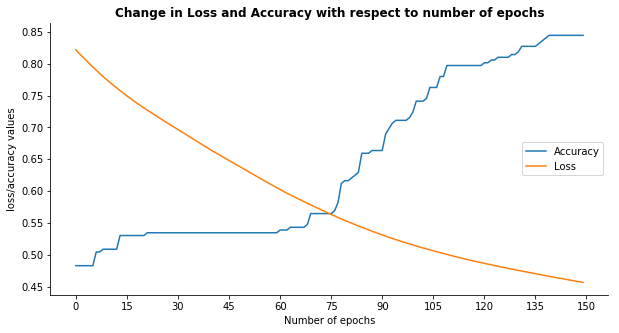

In [81]:
print(scores)
acc_onefifty = one_fifty_history .history['acc']
loss_onefifty= one_fifty_history .history['loss']
epoch = range(0,151)
ax = plt.subplot(111)
ax.plot(acc_onefifty, label="Accuracy")
plt.legend()
ax.plot(loss_onefifty, label="Loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("loss/accuracy values")
plt.title("Change in Loss and Accuracy with respect to number of epochs",fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(min(epoch), max(epoch)+1,15))
plt.show()
# The plot shows the model has increasein accuracy from approximately 
# 0.5 to 0.84(i.e 50% to 84% in 150epoch)
# and loss reduces from  0.8 to approximately 0.45 during 
# the training process for 150 epochs. 

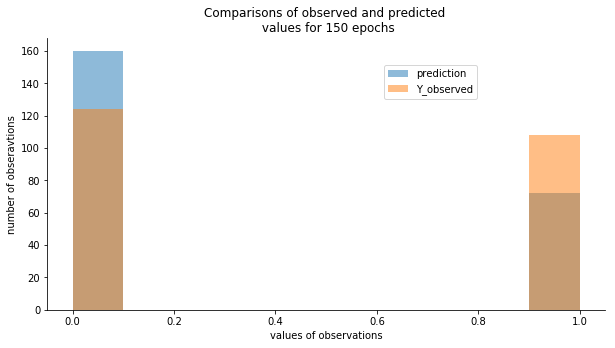

In [82]:
ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.5,histtype='stepfilled',label="prediction")
ax.legend()
ax.legend(loc='best', bbox_to_anchor=(0.78,0.92))
plt.hist(Y,alpha=0.5,histtype='stepfilled', label="Y_observed")
ax.legend()
ax.legend(loc='best', bbox_to_anchor=(0.78,0.92))
plt.xlabel("values of observations")
plt.ylabel("number of obseravtions")
plt.title("Comparisons of observed and predicted \n values for 150 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.rcParams['figure.figsize'] = [10,5]
# The prediction which are closer to 1's and 0's are plotted over 
# Y_observed. 84.4% are predicted close/equal to actual values.

#### 3 hidden layers with 8,16 and then 32 hidden nuerons - 10 epochs - 0.1 learning rate ===========================

In [83]:
np.random.seed(7)
model = Sequential()

model.add(Dense(8, input_dim=16, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])

ten_history = model.fit(X, Y, epochs=10, verbose=0)

scores = model.evaluate(X, Y)

Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')

print('')
print('================')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 1ms/step

acc: 99.57%

loss: 2.11%

Confusion Matrix
True negatives:  123
False negatives:  0
False positives:  1
True positives:  108


1 actual democrat is predicted as republican

[0.021094730155992097, 0.9956896551724138]


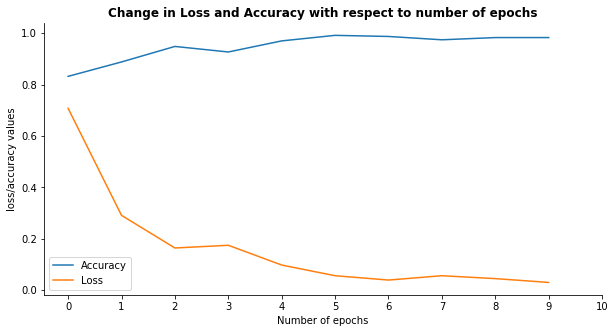

In [84]:
print(scores)
acc_ten = ten_history .history['acc']
loss_ten= ten_history .history['loss']
epoch = range(0,11)
ax = plt.subplot(111)
ax.plot(acc_ten, label="Accuracy")
plt.legend()
ax.plot(loss_ten, label="Loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("loss/accuracy values")
plt.title("Change in Loss and Accuracy with respect to number of epochs",fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(min(epoch), max(epoch)+1,1))
plt.show()
# The plot shows the model has increasein accuracy from approximately 
# 0.8 to 0.99(i.e 80% to 99% in 10epoch)
# and loss reduces from  0.75 to approximately 0.02 during 
# the training process for 10 epochs. 

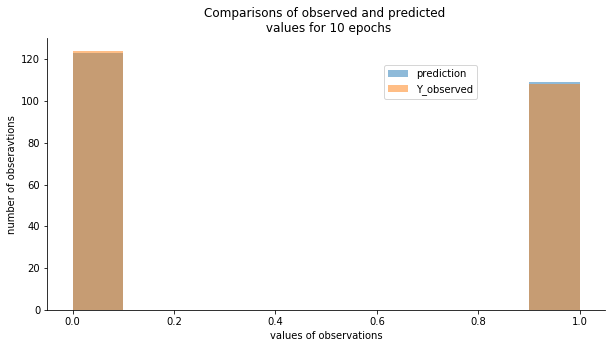

In [85]:
ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.5,histtype='stepfilled',label="prediction")
ax.legend()
ax.legend(loc='best', bbox_to_anchor=(0.78,0.92))
plt.hist(Y,alpha=0.5,histtype='stepfilled', label="Y_observed")
ax.legend()
ax.legend(loc='best', bbox_to_anchor=(0.78,0.92))
plt.xlabel("values of observations")
plt.ylabel("number of obseravtions")
plt.title("Comparisons of observed and predicted \n values for 10 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.rcParams['figure.figsize'] = [10,5]
# The prediction which are closer to 1's and 0's are plotted over 
# Y_observed. 99% are predicted close/equal to actual values

#### 1 hidden layers with 128 hidden nuerons - 500 epochs - 0.01 learning rate ===========================

In [86]:
np.random.seed(7)
model = Sequential()

model.add(Dense(128, input_dim=16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])

five_history = model.fit(X, Y, epochs=500, verbose=0)

scores = model.evaluate(X, Y)

Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')

print('')
print('================')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

232/232 [==============================] - 0s 2ms/step

acc: 100.00%

loss: 0.00%

Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108


[0.0014687232198474672, 1.0]


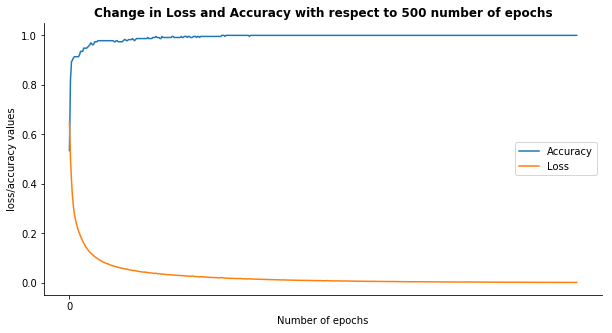

In [62]:
print(scores)
acc_five = five_history .history['acc']
loss_five = five_history .history['loss']
epoch = range(0,11)
ax = plt.subplot(111)
ax.plot(acc_five, label="Accuracy")
plt.legend()
ax.plot(loss_five, label="Loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("loss/accuracy values")
plt.title("Change in Loss and Accuracy with respect to 500 number of epochs",fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(min(epoch), max(epoch)+1,100))
plt.show()
# The plot shows the model has increase in accuracy from approximately 
# 0.54 to 1 (i.e 54% to 100% in 10epoch)
# and loss reduces from  0.67 to approximately 0 during 
# the training process for 10 epochs. 

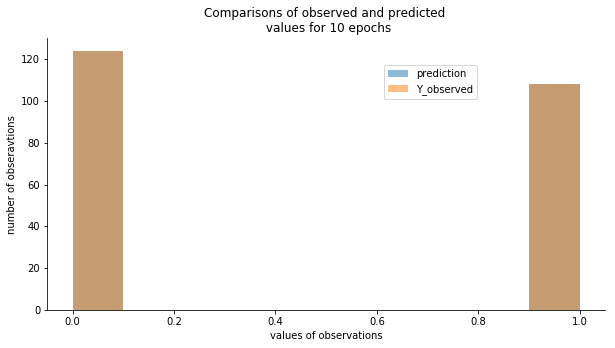

In [87]:
ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.5,histtype='stepfilled',label="prediction")
ax.legend()
ax.legend(loc='best', bbox_to_anchor=(0.78,0.92))
plt.hist(Y,alpha=0.5,histtype='stepfilled', label="Y_observed")
ax.legend()
ax.legend(loc='best', bbox_to_anchor=(0.78,0.92))
plt.xlabel("values of observations")
plt.ylabel("number of obseravtions")
plt.title("Comparisons of observed and predicted \n values for 10 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.rcParams['figure.figsize'] = [10,5]
# all y_pred matches with Y_observed. 100% accuracy.

references:

https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn encoding categorical to binary

https://www.w3schools.com/python/python_lambda.asp lamda

https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621 encoding vs one hot encoding

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/ for different learning rate